In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('../data/raw/data.csv',encoding='unicode_escape')

# Display the first few rows of the dataframe
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])


In [66]:
# Find and show the number of duplicate counts
duplicate_count = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 5268


In [67]:
# Find and show the number of NaNs in each column
nan_count = data.isna().sum()
print('Number of NaNs in each column:')
print(nan_count)


Number of NaNs in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [68]:
# Find and show where quantity is less than or equal to 0
quantity_issues = data[data['Quantity'] <= 0]
print('Rows where quantity is less than or equal to 0:')
print(quantity_issues.head(5))


Rows where quantity is less than or equal to 0:
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  


In [69]:
# Find and show where sales price is invalid or equal to 0
invalid_sales_price = data[data['UnitPrice'] <= 0]
print('Rows where sales price is invalid or equal to 0:')
print(invalid_sales_price.head(5))

Rows where sales price is invalid or equal to 0:
     InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  


In [70]:
data.dropna(subset=['CustomerID','Description'],inplace=True)
data.drop_duplicates(inplace=True)
data=data[data['Quantity']>0]
data=data[data['UnitPrice']>0]

data.describe()

pct_98_quantity=data['Quantity'].quantile(0.98)
pct_98_unitprice=data['UnitPrice'].quantile(0.98)

removed_outliers=data[(data['Quantity']<pct_98_quantity) &(data['UnitPrice']<pct_98_unitprice)]


<Axes: xlabel='Quantity', ylabel='Count'>

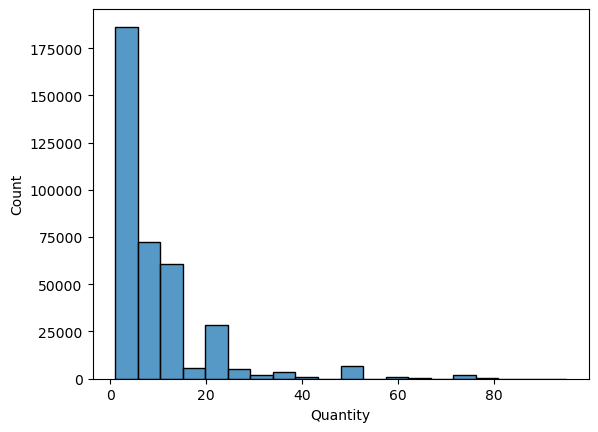

In [71]:
# Distribution 
sns.histplot(removed_outliers,x='Quantity',bins=20)

<Axes: xlabel='UnitPrice', ylabel='Count'>

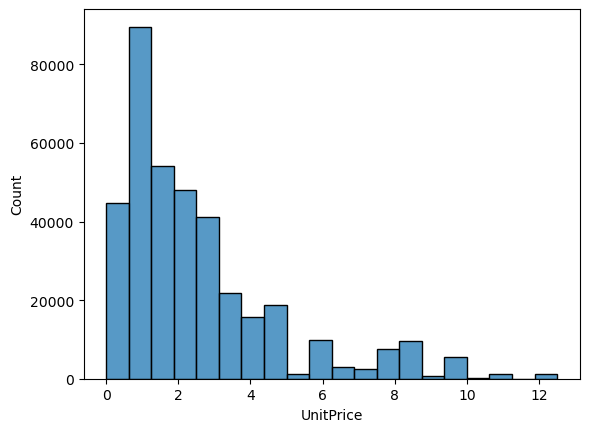

In [72]:
sns.histplot(removed_outliers,x='UnitPrice',bins=20)

# Feature Engineering

In [73]:
# Converting Customer ID into String.

data['Sales']=data['Quantity']*data['UnitPrice']
data['CustomerID']=data['CustomerID'].astype(str).str.replace('.0','',regex=False)

In [74]:
customer_df=data.groupby('CustomerID').agg({'InvoiceNo':'nunique','Description':'nunique','Sales':'sum','Quantity':'sum'}).reset_index()


In [75]:
customer_df.rename({'InvoiceNo':'Invoices','Description':'DistinctProducts','Quantity':'OverallQuantity'},axis=1,inplace=True)

In [76]:
customer_df['SalesPerInvoice']=round(customer_df['Sales']/customer_df['Invoices'],2)

In [77]:
customer_df['ItemsPerInvoice']=round(customer_df['OverallQuantity']/customer_df['Invoices'],2)

In [78]:
customer_df.sort_values('Invoices')

,CustomerID,Invoices,DistinctProducts,Sales,OverallQuantity,SalesPerInvoice,ItemsPerInvoice
0,12346,1,1,77183.60,74215,77183.60,74215.00
1519,14420,1,29,387.52,334,387.52,334.00
3278,16812,1,15,479.35,81,479.35,81.00
3284,16820,1,26,497.61,307,497.61,307.00
3285,16823,1,34,358.38,136,358.38,136.00
...,...,...,...,...,...,...,...
1661,14606,93,826,12076.15,6187,129.85,66.53
562,13089,97,662,58762.08,31025,605.79,319.85
4010,17841,124,1345,40519.84,22834,326.77,184.15
1879,14911,201,1816,143711.17,80240,714.98,399.20


In [79]:
overall_max_date=data['InvoiceDate'].max()

timerange_df=data.groupby('CustomerID').agg(min_date=('InvoiceDate','min'),max_date=('InvoiceDate','max')).reset_index()

timerange_df['DistinctMonths']=((timerange_df['max_date'].dt.year - timerange_df['min_date'].dt.year) * 12 + 
                                  (timerange_df['max_date'].dt.month - timerange_df['min_date'].dt.month))+1
timerange_df['LastBuyMonths']= ((overall_max_date.year - timerange_df['max_date'].dt.year) * 12 + 
                                  (overall_max_date.month - timerange_df['max_date'].dt.month))+1

customer_df=customer_df.merge(timerange_df[['CustomerID','DistinctMonths','LastBuyMonths']],on='CustomerID',how='left')	

In [80]:
customer_df['SalesPerMonth']=round(customer_df['Sales']/customer_df['DistinctMonths'])

In [87]:
data['WeekDay']= data['InvoiceDate'].dt.weekday
data['is_weekend']=data['InvoiceDate'].dt.weekday >=5

weekend_df=data.groupby('CustomerID').agg(uniqueWeekdayInovices=('InvoiceNo',lambda x:len(x[data['is_weekend']==False].unique())),
                                          uniqueWeekendInovices=('InvoiceNo',lambda x:len(x[data['is_weekend']==True].unique()))).reset_index()
customer_df=pd.merge(customer_df,weekend_df,how='left',on='CustomerID')
customer_df['WeekendPct']=customer_df['uniqueWeekendInovices']/customer_df['Invoices']

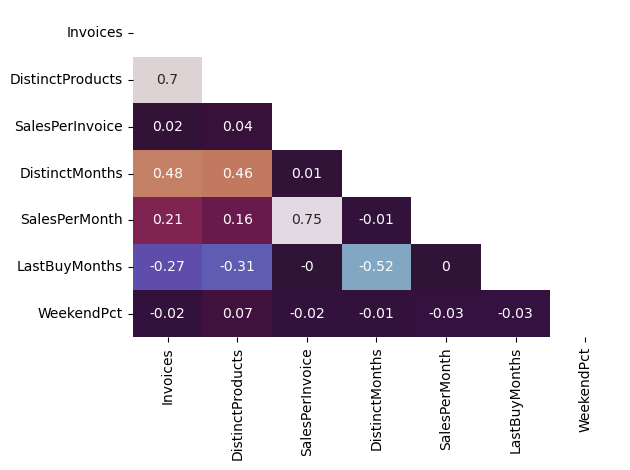

In [88]:
list_of_columns = ['CustomerID','Invoices','DistinctProducts',
                   'SalesPerInvoice','DistinctMonths','SalesPerMonth',
                   'LastBuyMonths','WeekendPct']

customer_df = customer_df[list_of_columns]

# Filter the dataset to include only numeric columns
numeric_df = customer_df.select_dtypes(include=['number'])

# Correlation matrices rounded to 1 decimal
pearson_corr = numeric_df.corr(method='pearson').round(2)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

sns.heatmap(pearson_corr, annot=True, cmap='twilight', center=0, mask=mask, cbar=False)

# Adjust layout for better display
plt.tight_layout()
plt.show()

In [93]:
train,test=train_test_split(customer_df, test_size=0.2)

In [95]:
train.shape,test.shape

((3470, 8), (868, 8))